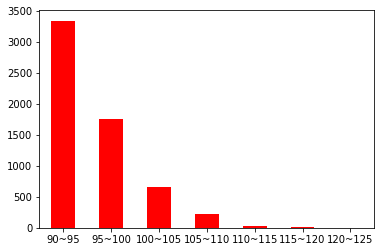

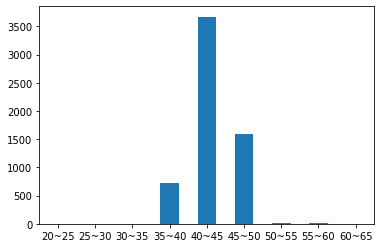

In [39]:
# 导入所需库
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# 读取文件
bj = pd.read_csv('20191018_2018年北京积分落户数据分析.csv')
# bj.head()

# describe() 展示一些基本信息
# bj.describe()
# bj.info()

# 按照 company 分组并计算每组个数
# groupby默认会把by的这个列作为索引列返回，可以设置下as_index=False
companyData = bj.groupby(by='company', as_index=False).count()[['company','name']]

# 重命名 companyData 列名称
companyData.rename(columns={'name': 'peopleCount'}, inplace=True)

# 按照 peopleCount 列排序
companyData = companyData.sort_values('peopleCount', ascending=False)
companyData


# 按条件过滤
# 只有一人的公司
companyData[companyData.peopleCount == 1]

# 人数前 50 的公司
companyData.head(50)

# 分数分布
# 按照步长 5 分桶统计下分数的分布
bins = np.arange(90, 130, 5)
bins = pd.cut(bj['score'], bins=bins)

binsCounts = bj.score.groupby(by=bins).count()

# 处理 index
binsCounts.index = [ str(x.left) + '~' + str(x.right) for x in binsCounts.index]
binsCounts.plot(kind='bar', alpha=1, rot=0, color='red')
plt.show()

# 年龄分布
# 出生日期转为年龄
bj['age'] = ((pd.to_datetime('2019/10/18') - pd.to_datetime(bj['birthday'])) / pd.Timedelta('365 days'))
bj.describe()

# 分数分布
# 按照步长 5 分桶统计下分数的分布
bins = np.arange(20, 70, 5)
bins = pd.cut(bj['age'], bins)
bin_counts = bj['age'].groupby(bins).count()

bin_counts.index = [ str(x.left) + '~' + str(x.right) for x in bin_counts.index ]
bin_counts.plot(kind='bar', alpha=1, rot=0)
plt.show()